In [1]:
#!pip install yfinance

In [2]:
import yfinance as yf

# Fetching the Tesla stock data for the past 5 years
tesla_stock_data = yf.download('TSLA', start='2018-01-01', end='2023-01-01')

# We will consider the Adjusted Close price
tesla_close = tesla_stock_data['Adj Close']

# Checking the head of the dataset
tesla_close.head()


[*********************100%%**********************]  1 of 1 completed


Date
2018-01-02    21.368668
2018-01-03    21.150000
2018-01-04    20.974667
2018-01-05    21.105333
2018-01-08    22.427334
Name: Adj Close, dtype: float64

In [3]:
import pandas as pd
from statsmodels.tsa.stattools import kpss, adfuller

# Function to run the ADF test
def adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    df_test = adfuller(timeseries, autolag='AIC')
    df_output = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' % key] = value
    print(df_output)

# Fetching the stock data
tesla_stock_data = yf.download('TSLA', start='2018-01-01', end='2023-01-01')
tesla_close = tesla_stock_data['Adj Close']

# Running the tests
adf_test(tesla_close)



[*********************100%%**********************]  1 of 1 completed
Results of Dickey-Fuller Test:
Test Statistic                   -1.301076
p-value                           0.628680
#Lags Used                       18.000000
Number of Observations Used    1240.000000
Critical Value (1%)              -3.435635
Critical Value (5%)              -2.863874
Critical Value (10%)             -2.568012
dtype: float64


ADF Statistic after differencing: -6.354135
p-value after differencing: 0.000000
Critical Values after differencing:
	1%: -3.436
	5%: -2.864
	10%: -2.568
The time series is stationary after differencing.


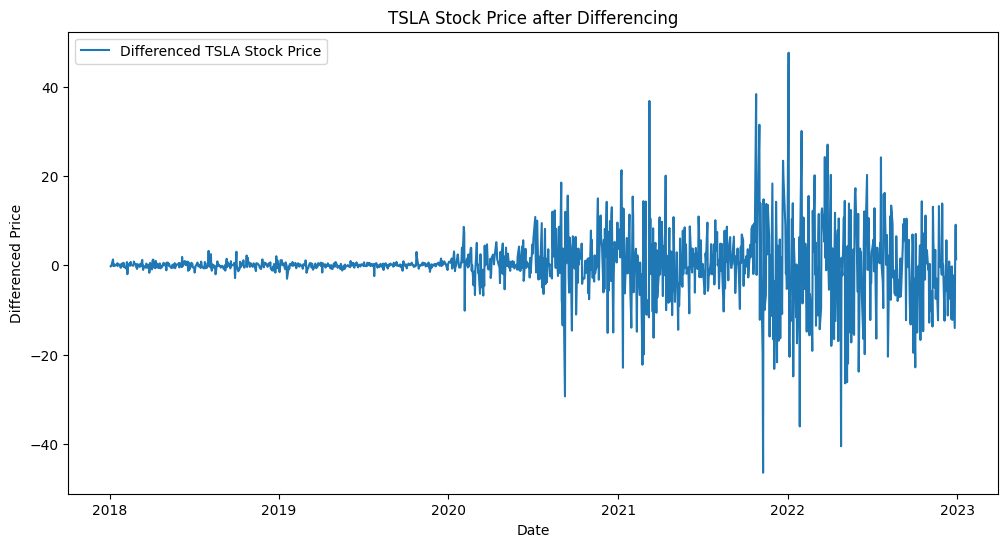

In [4]:
import matplotlib.pyplot as plt
# Applying differencing
tesla_close_diff = tesla_close.diff().dropna()

# Perform the ADF test again
adf_test_diff = adfuller(tesla_close_diff)


print('ADF Statistic after differencing: %f' % adf_test_diff[0])
print('p-value after differencing: %f' % adf_test_diff[1])
print('Critical Values after differencing:')
for key, value in adf_test_diff[4].items():
    print('\t%s: %.3f' % (key, value))

# Check for stationarity after differencing
if adf_test_diff[1] > 0.05:
    print("The time series is still not stationary after differencing.")
else:
    print("The time series is stationary after differencing.")

# Plotting the differenced time series
plt.figure(figsize=(12,6))
plt.plot(tesla_close_diff, label='Differenced TSLA Stock Price')
plt.title('TSLA Stock Price after Differencing')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.legend()
plt.show()


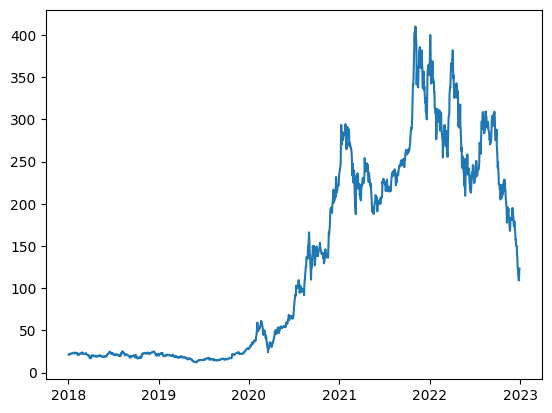

In [5]:
plt.plot(tesla_close)

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposition of the time series
decomposition = seasonal_decompose(tesla_close, model='multiplicative')

# Extracting the trend, seasonality, and residuals
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting the decomposition
plt.figure(figsize=(12,8))

plt.subplot(411)
plt.plot(tesla_close, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None